In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression

**EDA**

After cleaning, the next step in many data science projects is exploratory data analysis (EDA), 
- where you get a feel for your data by summarizing its main characteristics using descriptive statistics and data visualization. 
- A good way to plan your EDA is by looking each column and asking yourself questions what it says about your dataset.

Let us Import our clean Mexico Data;

In [5]:
df = pd.read_csv("C:/Users/Tsegi/Desktop/AAC_SCHOOL/DSProject/mx/mexicoData_clean.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  1736 non-null   object 
 1   state          1736 non-null   object 
 2   lat            1736 non-null   float64
 3   lon            1736 non-null   float64
 4   area_m2        1736 non-null   int64  
 5   price_usd      1736 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 81.5+ KB


In [7]:
df['area_m2'] = df['area_m2'].astype(float)

- there are only two `dtypes` in our DataFrame (`object` and `float64`), 
- there are three categories of  data: `location`, `categorical`, and `numeric`. 
    - Each of these require a different kind of exploration in our analysis. 

### Location Data: `"lat"` and `"lon"`

- It is known that the most important thing in real estate is location, 
- Since latitude and longitude are based on a coordinate system, a good way to visualize them is to create a scatter plot on top of a map. A great tool for this is the `scatter_mapbox`

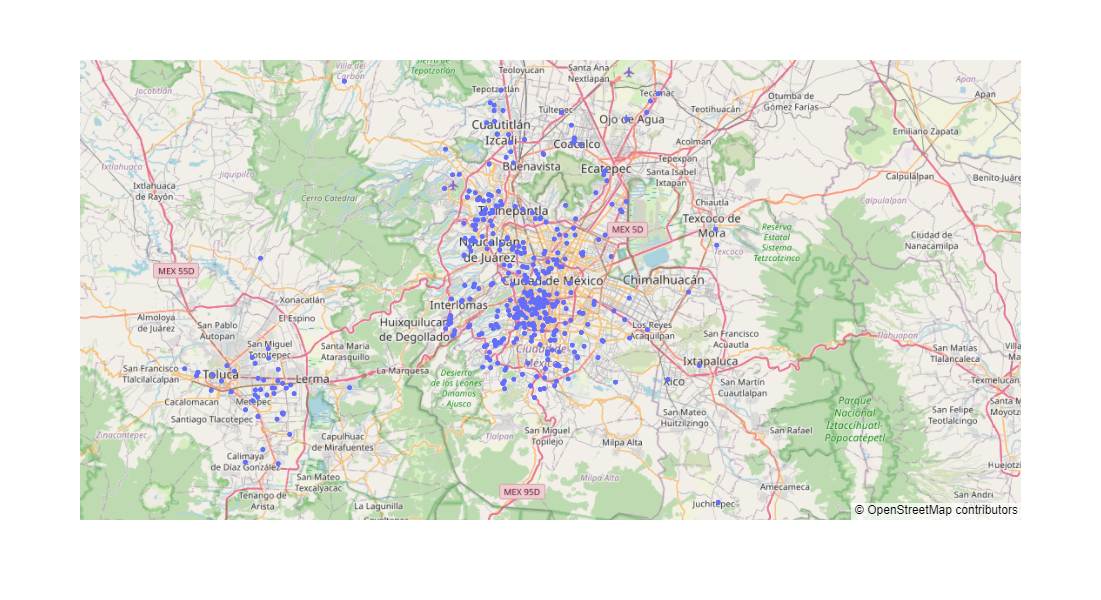

In [8]:

fig = px.scatter_mapbox(
    df,  # Our DataFrame
    lat="lat",
    lon="lon",
    center={"lat": 19.43, "lon": -99.13},  # Map will be centered on Mexico City
    width=600,  # Width of map
    height=600,  # Height of map
    hover_data=["price_usd"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

Plotly's Python graphing library makes interactive, publication-quality graphs. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.

- C:\Users\user>pip install plotly==5.20.0         
- python        
- import plotly

Looking at this map, 
- are the houses in our dataset distributed evenly throughout the country, or no
- are there states or regions that are more prevalent(dominant)? around center of mexico
- Can you guess where Mexico's biggest cities are based on this distribution?

In [9]:
df["state"].head()

0    Estado de México
1          Nuevo León
2            Guerrero
3            Guerrero
4             Yucatán
Name: state, dtype: object

In [10]:
df["state"].nunique()

30

In [11]:
df["state"].unique()

array(['Estado de México', 'Nuevo León', 'Guerrero', 'Yucatán',
       'Querétaro', 'Morelos', 'Chiapas', 'Tabasco', 'Distrito Federal',
       'Nayarit', 'Puebla', 'Veracruz de Ignacio de la Llave', 'Sinaloa',
       'Tamaulipas', 'Jalisco', 'San Luis Potosí', 'Baja California',
       'Hidalgo', 'Quintana Roo', 'Sonora', 'Chihuahua',
       'Baja California Sur', 'Zacatecas', 'Aguascalientes', 'Guanajuato',
       'Durango', 'Tlaxcala', 'Colima', 'Oaxaca', 'Campeche'],
      dtype=object)

Use the [`value_counts`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) method on the `"state"` column to determine the 10 most prevalent states in our dataset.

In [12]:
df["state"].value_counts()

state
Distrito Federal                   303
Estado de México                   179
Yucatán                            171
Morelos                            160
Querétaro                          128
Veracruz de Ignacio de la Llave    117
Puebla                              95
Nuevo León                          83
Jalisco                             60
San Luis Potosí                     55
Chiapas                             55
Guerrero                            49
Tamaulipas                          48
Quintana Roo                        38
Baja California                     29
Sinaloa                             26
Chihuahua                           20
Tabasco                             20
Hidalgo                             17
Baja California Sur                 15
Sonora                              12
Guanajuato                          12
Aguascalientes                      10
Nayarit                              9
Durango                              7
Tlaxcala           

In [13]:
df["state"].value_counts().head(10)

state
Distrito Federal                   303
Estado de México                   179
Yucatán                            171
Morelos                            160
Querétaro                          128
Veracruz de Ignacio de la Llave    117
Puebla                              95
Nuevo León                          83
Jalisco                             60
San Luis Potosí                     55
Name: count, dtype: int64

### Numerical Data: `"area_m2"` and `"price_usd"`

- Now, we have a sense for where the houses in our dataset are located, 
- but how much do they cost? How big are they? The best way to answer those questions is looking at descriptive statistics. 

**Task 1.3.4:** Use the [`describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method to print the mean, standard deviation, and quartiles for the `"area_m2"` and `"price_usd"` columns.

In [14]:
df.describe()

lat          lon      area_m2      price_usd
count  1736.000000  1736.000000  1736.000000    1736.000000
mean     20.765410   -98.798575   170.261521  120447.312517
std       2.743425     4.882553    80.594539   68753.901626
min      15.752900  -117.054763    60.000000   33192.480000
25%      19.275200  -100.392553   101.750000   67438.690000
50%      19.620518   -99.204001   156.000000  104319.230000
75%      21.073428   -98.245911   220.000000  157747.277500
max      32.665619   -86.767539   385.000000  364396.650000

In [15]:
df[["area_m2","price_usd"]].describe()

area_m2      price_usd
count  1736.000000    1736.000000
mean    170.261521  120447.312517
std      80.594539   68753.901626
min      60.000000   33192.480000
25%     101.750000   67438.690000
50%     156.000000  104319.230000
75%     220.000000  157747.277500
max     385.000000  364396.650000

In [16]:
df['area_m2'].quantile([0.3])

0.3    111.0
Name: area_m2, dtype: float64

**looking at `"area_m2"`**
- It's interesting that the mean is larger than the median (another name for the 50% quartile). Both of these statistics are supposed to give an idea of the "typical" value for the column, so why is there a difference of almost 14 m2 between them? 
- To answer this question, we need to see how house sizes are distributed in our dataset. 
- Let's look at two ways to visualize the distribution: a histogram and a boxplot.

Create a histogram of `"area_m2"`.

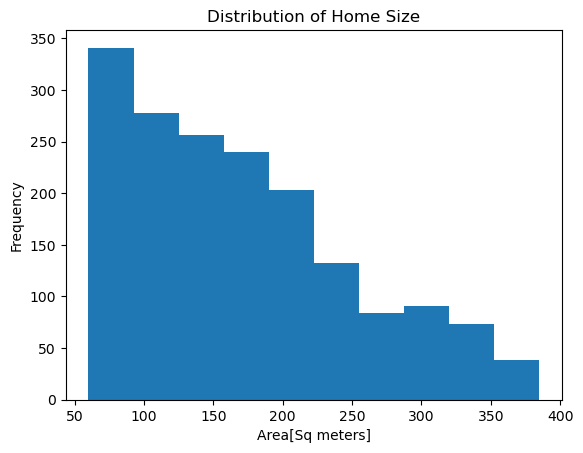

In [17]:
plt.hist(df["area_m2"])
plt.xlabel("Area[Sq meters]")
plt.ylabel("Frequency")
plt.title("Distribution of Home Size");

we can see that `"area_m2"` skews left. 
- In other words, there are more houses at the lower end of the distribution (50–200m<sup>2</sup>) than at the higher end (250–400m<sup>2</sup>). 
- That explains the difference between the mean and the median.

 Create a horizontal boxplot of `"area_m2"`.

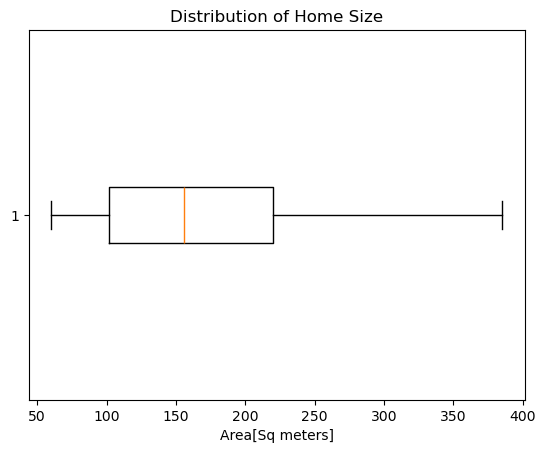

In [18]:
plt.boxplot(df["area_m2"],vert=False)
plt.xlabel("Area[Sq meters]")
plt.title("Distribution of Home Size");

**looking at `"price_usd"`** 

Does `"price_usd"` have the same distribution as `"price_per_m2"`? Let's use the same two visualization tools to find out.

Create a histogram of `"price_usd"`.

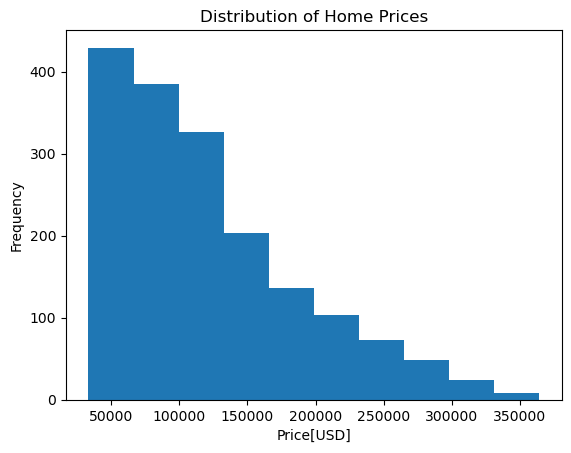

In [19]:
plt.hist(df["price_usd"])
plt.xlabel("Price[USD]")
plt.ylabel("Frequency")
plt.title("Distribution of Home Prices");

Looks like `"price_usd"` is even more skewed than `"area_m2"`. What does this bigger skew look like in a boxplot?

Create a horizontal boxplot of `"price_usd"`. 

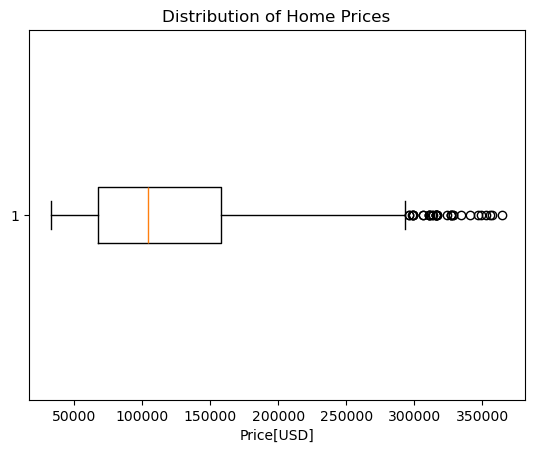

In [20]:
plt.boxplot(df["price_usd"],vert=False)
plt.xlabel("Price[USD]")
plt.title("Distribution of Home Prices");

- Now that you have a sense of for the dataset, 
- Next, start answering some research questions about the relationship between house size, price, and location.

[Basic Statistics Reference](https://www.scribbr.com/statistics/)